In [ ]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes

from sklearn.feature_extraction.text import CountVectorizer   
#for text vectorization


## The code ##

##This is one of the endpoint options you can read about on newsapi.org
End="https://newsapi.org/v1/articles"

##################################################Gates# 
## WAY 1  
## This is Dictionary Style. Here, we build a dictionary
## structure in Python and then use this to query the
## data. 
##
##  Notice that apiKey here has the "K" upper case
##  just like we had to do earlier. The details matter.
##  Notice also that we have several parameters now....
##  These are came from the newsapi.org site and each
##  must be written EXACTLY as shown on the site. 
##  For example, the S in pageSize is uppcase. 
#########################################################
URLPost = {'apiKey':'d5b473a6387249a583f547333b11ac27',
                    'source': 'bbc-news', 
                    'pageSize': 85,
                    'sortBy' : 'top',
                    'totalRequests': 75}

## Here we can print what we built
## It will print as a dictionary
print(URLPost)

## Here, we use the requests library in Python to 
## access the API and get the data
## The requests library has a method called "get"
## that we will use.
## We give "requests.get" two things: the endpoint,
## which is called End in this code and the 
## dictionary we built above called URLPost
response1=requests.get(End, URLPost)
print(response1)

## We MUST do this as well to see the results
## The results will be as json text and so we will use json
## to grab data from this text. 
jsontxt = response1.json()
print(jsontxt)



####################################################
### WAY 2
##  This is simply another option for using requests 
##  in Python. I use Way 1 when I want to place variables
##  into the dictionary structure. I use Way 2 when I want a 
##  copy of the URL generated. 
##  You can use whichever way you need for your goals
## - The right tool for the job....
##########################################################
url = ('https://newsapi.org/v2/everything?'
       'q=bitcoin&'
       #'from=2021-02-06&' 
       #'to=2020-03-07&'    
       'sources=bbc-news&'
       'pageSize=100&'
       'apiKey=8f4134f7d0 - your key - 1e22100f22b'
       #'qInTitle=Georgetown&'
       #'country=us'
)

## Some of the parameters are commented out. They are options.
print(url)

## This give you the following...comment this out if you paste it
https://newsapi.org/v2/everything?q=bitcoin&sources=bbc-news&pageSize=100&apiKey=8f4134fxxxxxxYourKEY

## Here again, we are using requests.get
## We can just give requests.get the url we made.
response2 = requests.get(url)
jsontxt2 = response2.json()
print(jsontxt2, "\n")

## NOTES
## Notice that in Way 1, we made a dictionary. 
## We DID NOT include ? or &. The DETAILS MATTER!
## In Way 2, we built the URL by hand and so put everything
## we needed into it. 

## Try this out. Change the values of the params, etc. 
## Once you can get this data - try a different API


In [7]:
import requests  #to query the API 
import re  #regular expressions
import pandas as pd   # for dataframes

from sklearn.feature_extraction.text import CountVectorizer 
topics=["politics", "u.s. politics", "U.S. President"]




## topics needs to be a list of strings (words)
## Next, let's build the csv file
## first and add the column names
## Create a new csv file to save the headlines
filename="NewHeadlines.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Date,Source,Title,Headline\n"
MyFILE.write(WriteThis)
MyFILE.close()

## CHeck it! Can you find this file?
    
#### --------------------> GATHER - CLEAN - CREATE FILE    

## RE: documentation and options
## https://newsapi.org/docs/endpoints/everything

endpoint="https://newsapi.org/v2/everything"

################# enter for loop to collect
################# data on three topics
#######################################

for topic in topics:

    ## Dictionary Structure
    URLPost = {'apiKey':'d5b473a6387249a583f547333b11ac27',
               'q':topic
    }

    response=requests.get(endpoint, URLPost)
    print(response)
    jsontxt = response.json()
    print(jsontxt)
    #####################################################
    
    
    ## Open the file for append
    MyFILE=open(filename, "a")
    LABEL=topic
    for items in jsontxt["articles"]:
        print(items, "\n\n\n")
                  
        #Author=items["author"]
        #Author=str(Author)
        #Author=Author.replace(',', '')
        
        Source=items["source"]["name"]
        print(Source)
        
        Date=items["publishedAt"]
        ##clean up the date
        NewDate=Date.split("T")
        Date=NewDate[0]
        print(Date)
        
        ## CLEAN the Title
        ##----------------------------------------------------------
        ##Replace punctuation with space
        # Accept one or more copies of punctuation         
        # plus zero or more copies of a space
        # and replace it with a single space
        Title=items["title"]
        Title=str(Title)
        #print(Title)
        Title=re.sub(r'[,.;@#?!&$\-\']+', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(' +', ' ', str(Title), flags=re.IGNORECASE)
        Title=re.sub(r'\"', ' ', str(Title), flags=re.IGNORECASE)
        
        # and replace it with a single space
        ## NOTE: Using the "^" on the inside of the [] means
        ## we want to look for any chars NOT a-z or A-Z and replace
        ## them with blank. This removes chars that should not be there.
        Title=re.sub(r'[^a-zA-Z]', " ", str(Title), flags=re.VERBOSE)
        Title=Title.replace(',', '')
        Title=' '.join(Title.split())
        Title=re.sub("\n|\r", "", Title)
        print(Title)
        ##----------------------------------------------------------
        
        Headline=items["description"]
        Headline=str(Headline)
        Headline=re.sub(r'[,.;@#?!&$\-\']+', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(' +', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'\"', ' ', Headline, flags=re.IGNORECASE)
        Headline=re.sub(r'[^a-zA-Z]', " ", Headline, flags=re.VERBOSE)
        ## Be sure there are no commas in the headlines or it will
        ## write poorly to a csv file....
        Headline=Headline.replace(',', '')
        Headline=' '.join(Headline.split())
        Headline=re.sub("\n|\r", "", Headline)
        
        ### AS AN OPTION - remove words of a given length............
        Headline = ' '.join([wd for wd in Headline.split() if len(wd)>3])
    
        #print("Author: ", Author, "\n")
        #print("Title: ", Title, "\n")
        #print("Headline News Item: ", Headline, "\n\n")
        
        #print(Author)
        print(Title)
        print(Headline)
        
        WriteThis=str(LABEL)+","+str(Date)+","+str(Source)+","+ str(Title) + "," + str(Headline) + "\n"
        print(WriteThis)
        
        MyFILE.write(WriteThis)
        
    ## CLOSE THE FILE
    MyFILE.close()

<Response [200]>
{'status': 'ok', 'totalResults': 22708, 'articles': [{'source': {'id': 'bbc-news', 'name': 'BBC News'}, 'author': 'https://www.facebook.com/bbcnews', 'title': 'What does the US Speaker of the House do?', 'description': 'Republican Kevin McCarthy is seeking to become Speaker, one of the most powerful roles in US politics.', 'url': 'https://www.bbc.co.uk/news/world-us-canada-64168529', 'urlToImage': 'https://ichef.bbci.co.uk/news/1024/branded_news/0BCB/production/_128191030_gettyimages-1454223240.jpg', 'publishedAt': '2023-01-04T17:51:54Z', 'content': 'A historic drama is playing out in the US House of Representatives as they attempt to choose a Speaker of the House.\r\nRepresentative Kevin McCarthy, the leader of the House Republicans, has lost four… [+4006 chars]'}, {'source': {'id': 'cnn', 'name': 'CNN'}, 'author': 'Jill Filipovic', 'title': "Opinion: Minors' rights can't be left up to their parents' politics", 'description': 'Some of the most contentious debates in A

<Response [200]>
{'status': 'ok', 'totalResults': 5416, 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': None, 'title': 'Hardliner Jim Jordan emerges as a Republican alternative for U.S. ... - Reuters.com', 'description': "For much of the last 16 years Republican Jim Jordan's combative, in-your-face style of politics made the former college wrestler a constant source of trouble for his party's leadership in the U.S. House of Representatives.", 'url': 'https://www.reuters.com/world/us/hardliner-jim-jordan-emerges-republican-alternative-us-house-speaker-2023-01-03/', 'urlToImage': 'https://www.reuters.com/resizer/uRPW8vX_v6mFjp7DJqIjrV-sFss=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/XRUBOHVF2JIX3JQYUIKVYYRYMU.jpg', 'publishedAt': '2023-01-03T22:53:00Z', 'content': "WASHINGTON, Jan 3 (Reuters) - For much of the last 16 years Republican Jim Jordan's combative, in-your-face style of politics made the former college wrestl

<Response [200]>
{'status': 'ok', 'totalResults': 38563, 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'}, 'author': None, 'title': "Classified documents found at former U.S. Vice President Pence's ... - Reuters", 'description': "Documents marked as classified were discovered at former U.S. Vice President Mike Pence's Indiana home last week, and he has turned those classified records over to the FBI, his representative said in letters seen by Reuters.", 'url': 'https://www.reuters.com/world/us/classified-documents-found-former-us-vice-president-pences-indiana-home-cnn-2023-01-24/', 'urlToImage': 'https://www.reuters.com/resizer/23LG5S14wcrIOfQvFmFFquSBUGc=/1200x628/smart/filters:quality(80)/cloudfront-us-east-2.images.arcpublishing.com/reuters/WHAYUJP73BJSJAIUD6QYHVRMFI.jpg', 'publishedAt': '2023-01-24T17:18:00Z', 'content': "WASHINGTON, Jan 24 (Reuters) - Documents marked as classified were discovered at former U.S. Vice President Mike Pence's Indiana home last week, and h

In [4]:
endpoint, URLPost

('https://newsapi.org/v2/everything',
 {'apiKey': 'd5b473a6387249a583f547333b11ac27', 'q': 'U.S. President'})

In [8]:
for i in topics: 
    print("https://newsapi.org/v2/everything?q="+str(i)+"&apiKey=8f4134fxxxxxxYourKEY")

https://newsapi.org/v2/everything?q=politics&apiKey=8f4134fxxxxxxYourKEY
https://newsapi.org/v2/everything?q=u.s. politics&apiKey=8f4134fxxxxxxYourKEY
https://newsapi.org/v2/everything?q=U.S. President&apiKey=8f4134fxxxxxxYourKEY


In [32]:
headlines_df = pd.read_csv('NewHeadlines.csv')
headlines_df

for index, row in headlines_df.iterrows():
    if row['LABEL'] == 'politics':
        f = open('/Users/Max/Documents/Text mining /Politics/new_file_%row["LABEL"].txt' % row["Headline"], 'w')
        f.write(row["Headline"])
        f.close()
#     print(row['LABEL'], row['Headline'])
    elif row['LABEL'] == 'u.s. politics':
        f = open('/Users/Max/Documents/Text mining /u.s. politics/new_file_%row["LABEL"].txt' % row["Headline"], 'w')
        f.write(row["Headline"])
        f.close()
    elif row['LABEL'] == 'U.S. President':
        f = open('/Users/Max/Documents/Text mining /U.S. Presidents/new_file_%row["LABEL"].txt' % row["Headline"], 'w')
        f.write(row["Headline"])
        f.close()

In [38]:
import os
My_FN_CV = CountVectorizer(input = "filename", stop_words="english")
MyPath="/Users/Max/Documents/Text mining /"
MyCompleteFileNames = []
MyLabels = []
for folderName in ['Politics','u.s. politics','U.S. Presidents']:
    ## Get the files 
    filenames=os.listdir(MyPath + folderName)
    #print(filenames)  
    for eachfile in filenames:
        if eachfile !=  ".ipynb_checkpoints":
#             print(eachfile)
        # The "str" assures that everything is a string
            fullpath=MyPath + str(folderName) + "/" + str(eachfile)
        # C:/Users/profa/Documents/Python Scripts/TextMining/Week2_3/POS/P1.txt
#         print(fullpath)
            MyCompleteFileNames.append(fullpath)
            MyLabels.append(folderName)


        
MyTextData1 = My_FN_CV.fit_transform(MyCompleteFileNames)
## MyTextData1 is a DTM
# print(type(MyTextData1))
## Get the column names
MyCol_Names=My_FN_CV.get_feature_names_out()
FinalDF = pd.DataFrame(MyTextData1.toarray(), columns=MyCol_Names)


for nextcol in FinalDF.columns:
    if(re.search(r'[^A-Za-z]+', nextcol)):
#         print(nextcol)
        FinalDF=FinalDF.drop([nextcol], axis=1)

    elif(len(str(nextcol))<9):
#                 print(nextcol)
        FinalDF=FinalDF.drop([nextcol], axis=1)
    elif(len(str(nextcol))>15):
#                 print(nextcol)
        FinalDF=FinalDF.drop([nextcol], axis=1)
#     elif(nextcol in RemoveWords):
# #                 print(nextcol)
#         FinalDF=FinalDF.drop([nextcol], axis=1)
    elif(len(str(nextcol))<=3):
        print(nextcol)
        FinalDF=FinalDF.drop([nextcol], axis=1)
FinalDF['LABEL'] = MyLabels
print(FinalDF)  

     abdominal  accepting  accompanied  according  accusations  accustomed  \
0            0          0            0          0            0           0   
1            0          0            0          0            0           0   
2            0          0            0          0            0           0   
3            0          0            0          0            0           0   
4            0          0            0          0            0           0   
..         ...        ...          ...        ...          ...         ...   
291          0          0            0          0            0           0   
292          0          0            0          0            0           0   
293          0          0            0          0            0           0   
294          0          0            0          0            0           0   
295          0          0            0          0            0           0   

     acknowledged  activities  addiction  additional  ...  when

Text(0.5, 1.0, 'Stemmer_All')

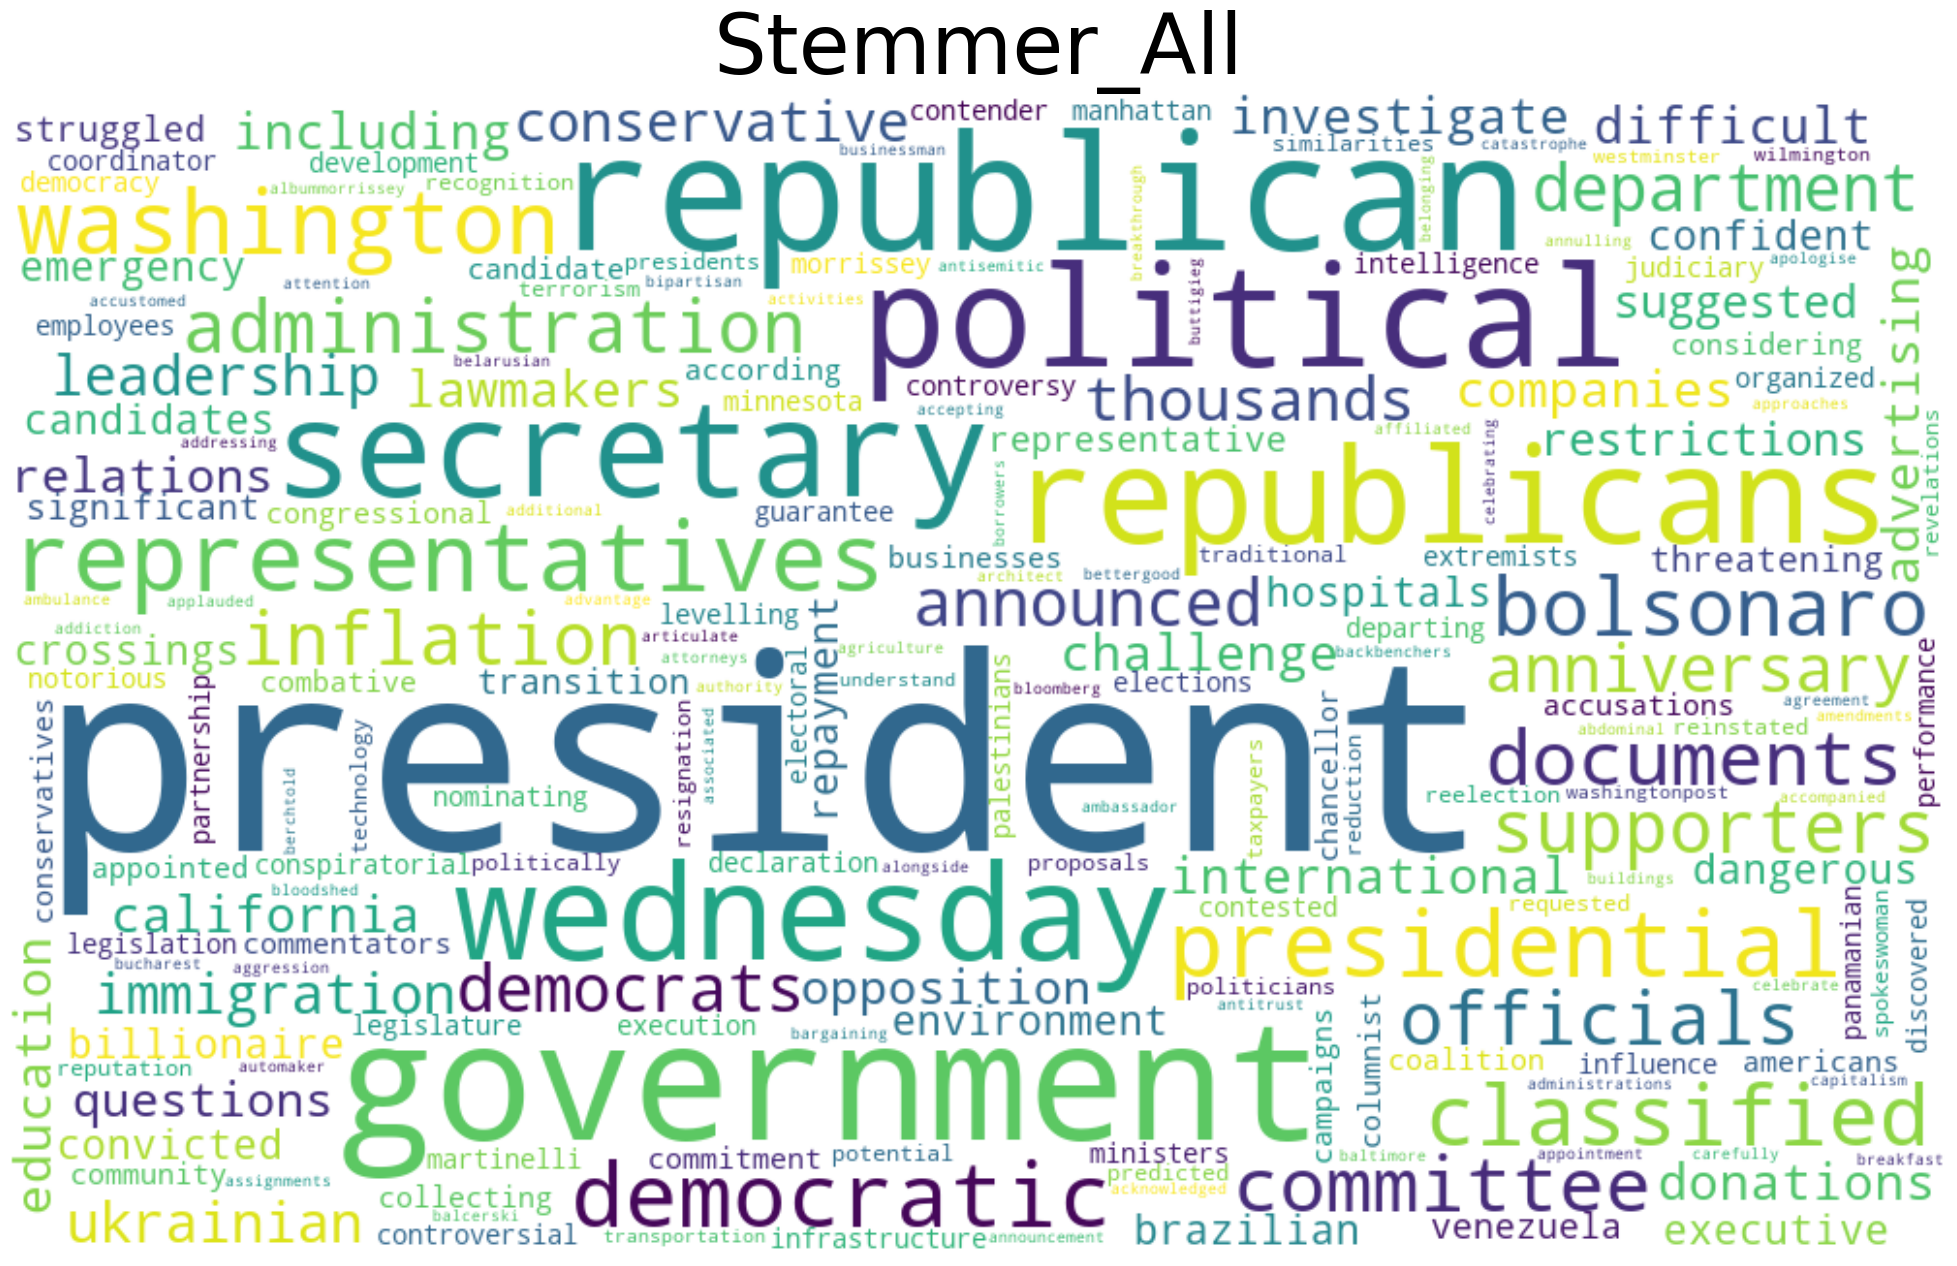

In [41]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 
tempdf =FinalDF.sum(axis=0,numeric_only=True)
#         print(tempdf)

#Make var name
#         print(speech_links)
WC1=WordCloud(width=1000, height=600, background_color="white",
               min_word_length=4, #mask=next_image,
               max_words=200).generate_from_frequencies(tempdf)
## Here, this list holds all three wordclouds I am building

##########
########## Create the wordcloud
##########
fig=plt.figure(figsize=(25, 25))
#figure, axes = plt.subplots(nrows=2, ncols=2)



plt.imshow(WC1, interpolation='bilinear')
plt.axis("off")
plt.title("Stemmer_All", fontsize=60)

In [79]:
filename="CampaignFiances.csv"
MyFILE=open(filename,"w")  # "a"  for append   "r" for read
## with open
### Place the column names in - write to the first row
WriteThis="LABEL,Total_funds\n"
MyFILE.write(WriteThis)
MyFILE.close()
election_year_list = [2020,2016,2012,2008,2004,2000,1996,1992,1988,1984,1980]
for election_year in election_year_list:
    url= 'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/?election_year='+str(election_year)+'&per_page=50&sort_nulls_last=false&sort_hide_null=false&page=1&sort_null_only=false&sort=-net_receipts&api_key='
    api_key = 'mgAtbSA51wZAb7wdUqVztUDuaMIq5trR6jnmnxoi'
    url_full = str(url+api_key)
    response2 = requests.get(url_full)
    jsontxt2 = response2.json()
    print(jsontxt2, "\n")
    MyFILE=open(filename, "a")
    LABEL=election_year 
    for items in jsontxt2['results']:
        if items["contributor_state"] == "US" and items["candidate_last_name"] == "All candidates":
            total_funds = items['net_receipts']
   
            WriteThis=str(LABEL)+ "," + str(total_funds) + "\n"
            print(WriteThis)

            MyFILE.write(WriteThis)

        ## CLOSE THE FILE
        MyFILE.close()

{'api_version': '1.0', 'pagination': {'count': 2064, 'per_page': 50, 'page': 1, 'pages': 42}, 'results': [{'candidate_id': 'P00000001', 'candidate_party_affiliation': None, 'rounded_net_receipts': 4021.2, 'election_year': 2020, 'contributor_state': 'US', 'net_receipts': 4021221646.4, 'candidate_last_name': 'All candidates'}, {'candidate_id': 'P00000002', 'candidate_party_affiliation': 'DEM', 'rounded_net_receipts': 3203.8, 'election_year': 2020, 'contributor_state': 'US', 'net_receipts': 3203812621.3, 'candidate_last_name': 'Democrats'}, {'candidate_id': 'P00014530', 'candidate_party_affiliation': 'DEM', 'rounded_net_receipts': 1096.3, 'election_year': 2020, 'contributor_state': 'US', 'net_receipts': 1096324410.77, 'candidate_last_name': 'Bloomberg'}, {'candidate_id': 'P80000722', 'candidate_party_affiliation': 'DEM', 'rounded_net_receipts': 1051.4, 'election_year': 2020, 'contributor_state': 'US', 'net_receipts': 1051374613.89, 'candidate_last_name': 'Biden'}, {'candidate_id': 'P00000

{'api_version': '1.0', 'pagination': {'count': 1669, 'per_page': 50, 'page': 1, 'pages': 34}, 'results': [{'candidate_id': 'P00000001', 'candidate_party_affiliation': None, 'rounded_net_receipts': 1462.3, 'election_year': 2016, 'contributor_state': 'US', 'net_receipts': 1462314770.13, 'candidate_last_name': 'All candidates'}, {'candidate_id': 'P00000002', 'candidate_party_affiliation': 'DEM', 'rounded_net_receipts': 799.4, 'election_year': 2016, 'contributor_state': 'US', 'net_receipts': 799419661.15, 'candidate_last_name': 'Democrats'}, {'candidate_id': 'P00000003', 'candidate_party_affiliation': 'REP', 'rounded_net_receipts': 639.1, 'election_year': 2016, 'contributor_state': 'US', 'net_receipts': 639144333.21, 'candidate_last_name': 'Republicans'}, {'candidate_id': 'P00003392', 'candidate_party_affiliation': 'DEM', 'rounded_net_receipts': 563.8, 'election_year': 2016, 'contributor_state': 'US', 'net_receipts': 563756927.19, 'candidate_last_name': 'Clinton'}, {'candidate_id': 'P80001

{'api_version': '1.0', 'pagination': {'count': 0, 'per_page': 50, 'page': 1, 'pages': 0}, 'results': []} 

{'api_version': '1.0', 'pagination': {'page': 1, 'pages': 0, 'per_page': 50, 'count': 0}, 'results': []} 

{'api_version': '1.0', 'pagination': {'pages': 0, 'page': 1, 'count': 0, 'per_page': 50}, 'results': []} 

{'api_version': '1.0', 'pagination': {'pages': 0, 'per_page': 50, 'count': 0, 'page': 1}, 'results': []} 

{'api_version': '1.0', 'pagination': {'pages': 0, 'page': 1, 'count': 0, 'per_page': 50}, 'results': []} 

{'api_version': '1.0', 'pagination': {'pages': 0, 'page': 1, 'count': 0, 'per_page': 50}, 'results': []} 

{'api_version': '1.0', 'pagination': {'page': 1, 'pages': 0, 'per_page': 50, 'count': 0}, 'results': []} 

{'api_version': '1.0', 'pagination': {'per_page': 50, 'pages': 0, 'page': 1, 'count': 0}, 'results': []} 

{'api_version': '1.0', 'results': [], 'pagination': {'count': 0, 'pages': 0, 'page': 1, 'per_page': 50}} 



In [83]:
finances = pd.read_csv("CampaignFiances.csv")
finances

,LABEL,Total_funds
0,2020,"4,021,221,646.40"
1,2016,"1,462,314,770.13"


In [88]:
url_SHOW = url+"API_Key_goes_here"
url_SHOW

'https://api.open.fec.gov/v1/presidential/contributions/by_candidate/?election_year=1980&per_page=50&sort_nulls_last=false&sort_hide_null=false&page=1&sort_null_only=false&sort=-net_receipts&api_key=API_Key_goes_here'